In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import squarify
import circlify

C:\Users\mykar\AppData\Roaming\Python\Python312\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\mykar\AppData\Local\Temp\ipykernel_18520\3480280051.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
PURPLE = '#7c4ea6'
BLUE = '#5094c3'
YELLOW = '#f9c154'
WHITE = '#ffffff'

In [3]:
df = pd.read_csv('bbb.csv')
df

,category,value
0,Smart home,101.2
1,Smart home,16.3
2,Smart home,134.0
3,Pet,17.9
4,Pet,17.9
...,...,...
157,Baby and kids,17.9
158,Baby and kids,16.1
159,Baby and kids,88.1
160,Baby and kids,15.6


In [4]:
df['color'] = PURPLE
df.loc[df['category']=='Bed','color'] = YELLOW
df.loc[df['category']=='Bath','color'] = BLUE

In [5]:
df['category'].unique()

array(['Smart home', 'Pet', 'Personalized gifts', 'Outdoor', 'More',
       'Kitchen', 'Home decor', 'Holiday', 'Health and beauty',
       'Furniture', 'Dining', 'Curtains and windows', 'College',
       'Cleaning and storage', 'Bed', 'Bath', 'Baby and kids'],
      dtype=object)

In [6]:
df = df.sort_values(by='value', ascending=False).reset_index(drop=True)
category_sums = df.groupby('category')['value'].sum()
sorted_categories = category_sums.sort_values(ascending=False).index
sorted_df = df.set_index('category').loc[sorted_categories].reset_index()

sorted_df

,category,value,color
0,Kitchen,168.4,#7c4ea6
1,Kitchen,152.7,#7c4ea6
2,Kitchen,123.2,#7c4ea6
3,Kitchen,100.7,#7c4ea6
4,Kitchen,88.1,#7c4ea6
...,...,...,...
157,Pet,17.9,#7c4ea6
158,Pet,17.9,#7c4ea6
159,Pet,15.6,#7c4ea6
160,Pet,15.6,#7c4ea6


In [7]:
df2 = df.groupby(by='category').sum().reset_index()
df2 = df2.sort_values(by='value', ascending=False).reset_index(drop=True)
df2['color'] = PURPLE
df2.loc[3, 'color'] = BLUE
df2.loc[10, 'color'] = YELLOW
df2

,category,value,color
0,Kitchen,1063.7,#7c4ea6
1,Home decor,979.5,#7c4ea6
2,Furniture,940.6,#7c4ea6
3,Bath,813.7,#5094c3
4,Health and beauty,808.4,#7c4ea6
5,Outdoor,781.4,#7c4ea6
6,Dining,730.4,#7c4ea6
7,Baby and kids,696.0,#7c4ea6
8,College,695.9,#7c4ea6
9,Cleaning and storage,682.8,#7c4ea6


In [8]:
# data = []
# for index, row in df2.iterrows():
#     cat_dict = dict(id=df2.iloc[index,0], datum=df2.iloc[index,1], children=[])

#     individual_cat_values = []
#     for index2, row in df.iterrows():
#         if df.iloc[index2, 0] == df2.iloc[index,0]:
#             # print(df.iloc[index2, 1])
#             individual_cat_values.append(df.iloc[index2, 1])
#             cat_dict.update({'children': individual_cat_values})
#     data.append(cat_dict)
# data



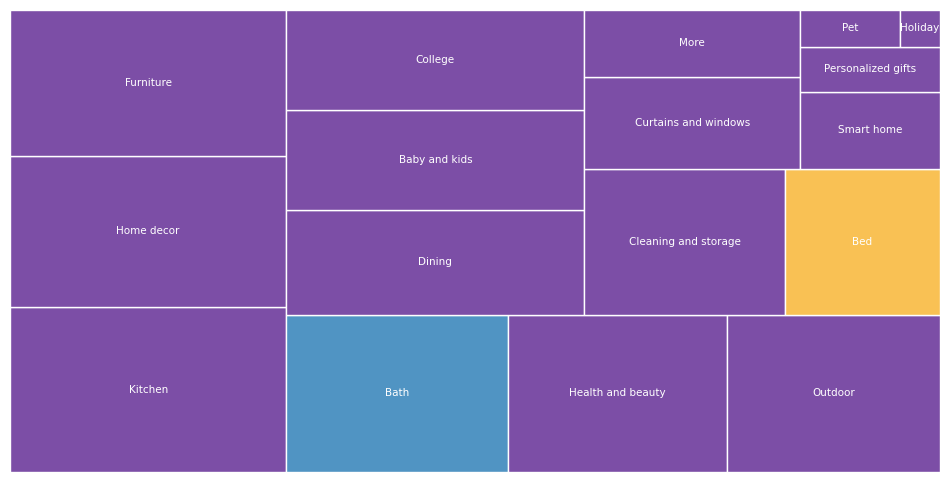

In [9]:
fig, ax = plt.subplots(figsize=(12,6))

df2_value = df2['value']
df2_category = df2['category']

squarify.plot(df2_value, label=df2_category, color=df2['color'],ax=ax, edgecolor=WHITE, text_kwargs=dict(fontsize=7.5, color=WHITE))
  
plt.axis("off") 

plt.show()

In [10]:
df2

,category,value,color
0,Kitchen,1063.7,#7c4ea6
1,Home decor,979.5,#7c4ea6
2,Furniture,940.6,#7c4ea6
3,Bath,813.7,#5094c3
4,Health and beauty,808.4,#7c4ea6
5,Outdoor,781.4,#7c4ea6
6,Dining,730.4,#7c4ea6
7,Baby and kids,696.0,#7c4ea6
8,College,695.9,#7c4ea6
9,Cleaning and storage,682.8,#7c4ea6


In [11]:
for index, row in df2.iterrows():
    category_df = sorted_df[sorted_df['category']==df2.iloc[index,0]]
    print(index, category_df)

0    category  value    color
0   Kitchen  168.4  #7c4ea6
1   Kitchen  152.7  #7c4ea6
2   Kitchen  123.2  #7c4ea6
3   Kitchen  100.7  #7c4ea6
4   Kitchen   88.1  #7c4ea6
5   Kitchen   84.0  #7c4ea6
6   Kitchen   83.5  #7c4ea6
7   Kitchen   69.3  #7c4ea6
8   Kitchen   66.5  #7c4ea6
9   Kitchen   53.1  #7c4ea6
10  Kitchen   39.8  #7c4ea6
11  Kitchen   18.1  #7c4ea6
12  Kitchen   16.3  #7c4ea6
1       category  value    color
13  Home decor  134.0  #7c4ea6
14  Home decor  101.8  #7c4ea6
15  Home decor  100.7  #7c4ea6
16  Home decor  100.1  #7c4ea6
17  Home decor   88.7  #7c4ea6
18  Home decor   84.0  #7c4ea6
19  Home decor   84.0  #7c4ea6
20  Home decor   84.0  #7c4ea6
21  Home decor   66.5  #7c4ea6
22  Home decor   66.5  #7c4ea6
23  Home decor   53.1  #7c4ea6
24  Home decor   16.1  #7c4ea6
2      category  value    color
25  Furniture  152.7  #7c4ea6
26  Furniture  150.7  #7c4ea6
27  Furniture  118.2  #7c4ea6
28  Furniture  106.4  #7c4ea6
29  Furniture  100.7  #7c4ea6
30  Furniture   88.

## Answer 2

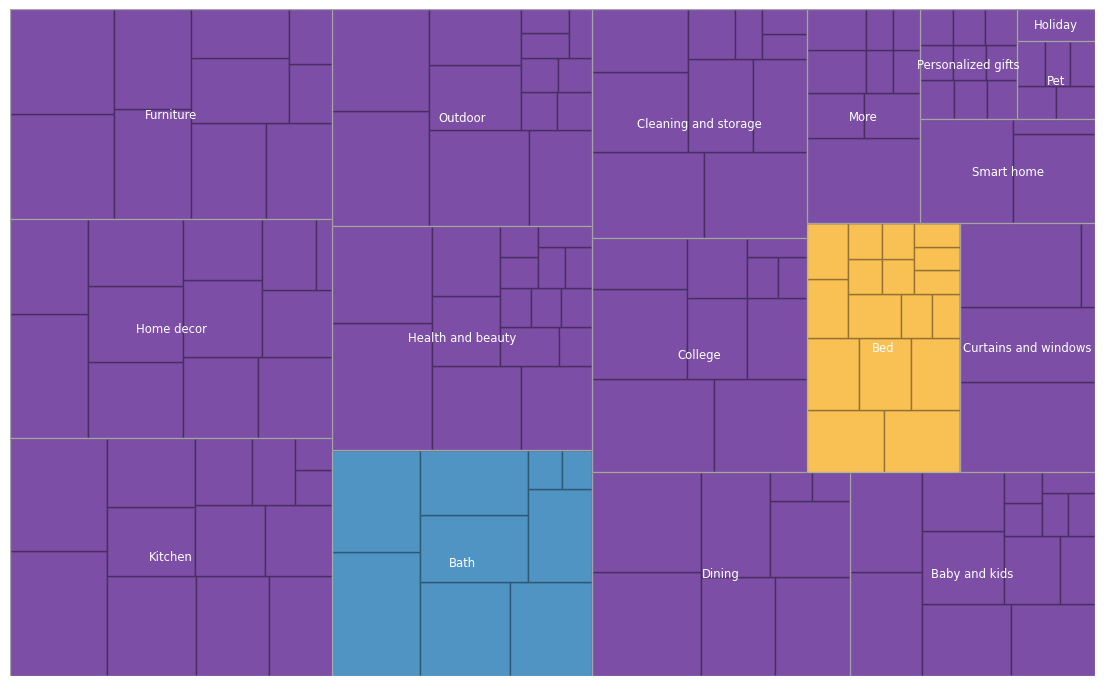

In [12]:
from matplotlib.patches import Rectangle
x = 0
y = 0
width = 1400
height = 866
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(figsize=(width*px,height*px))

ax.set_xlim(x, width)
ax.set_ylim(y, height)

category_normalized = squarify.normalize_sizes(df2['value'], width, height)

category_rectangles = squarify.squarify(category_normalized, x, y, width, height)

for index, row in df2.iterrows():
    category_df = sorted_df[sorted_df['category']==df2.iloc[index,0]]
    category_normalized = squarify.normalize_sizes(category_df['value'], category_rectangles[index].get('dx'), category_rectangles[index].get('dy'))
    category_squarify = squarify.squarify(category_normalized, category_rectangles[index].get('x'), category_rectangles[index].get('y'), category_rectangles[index].get('dx'), category_rectangles[index].get('dy'))
    for r in category_squarify:
        ax.add_patch(patches.Rectangle((r['x'], r['y']), r['dx'], r['dy'], ec='black', color=df2.iloc[index,2]))
    ax.add_patch(patches.Rectangle((category_rectangles[index]['x'], category_rectangles[index]['y']), category_rectangles[index]['dx'], category_rectangles[index]['dy'],alpha=0.6, ec='white',label=df2.iloc[index,0], facecolor=df2.iloc[index,2]))
    x_text = category_rectangles[index]['x'] + category_rectangles[index]['dx'] / 2
    y_text = category_rectangles[index]['y'] + category_rectangles[index]['dy'] / 2
    ax.text(x_text, y_text,df2.iloc[index,0], ha='center', va='center', fontsize='small', color='white')


plt.axis("off")
    
plt.show()

In [13]:
df_bbb = df2.groupby('color', as_index=False).sum()
df_bbb = df_bbb[['category', 'value', 'color']]
df_bbb.loc[1, 'category'] = 'Beyond'
df_bbb = df_bbb.sort_values(by='category').reset_index(drop=True)
df_bbb

,category,value,color
0,Bath,813.7,#5094c3
1,Bed,528.5,#f9c154
2,Beyond,8699.8,#7c4ea6


## Answer 3

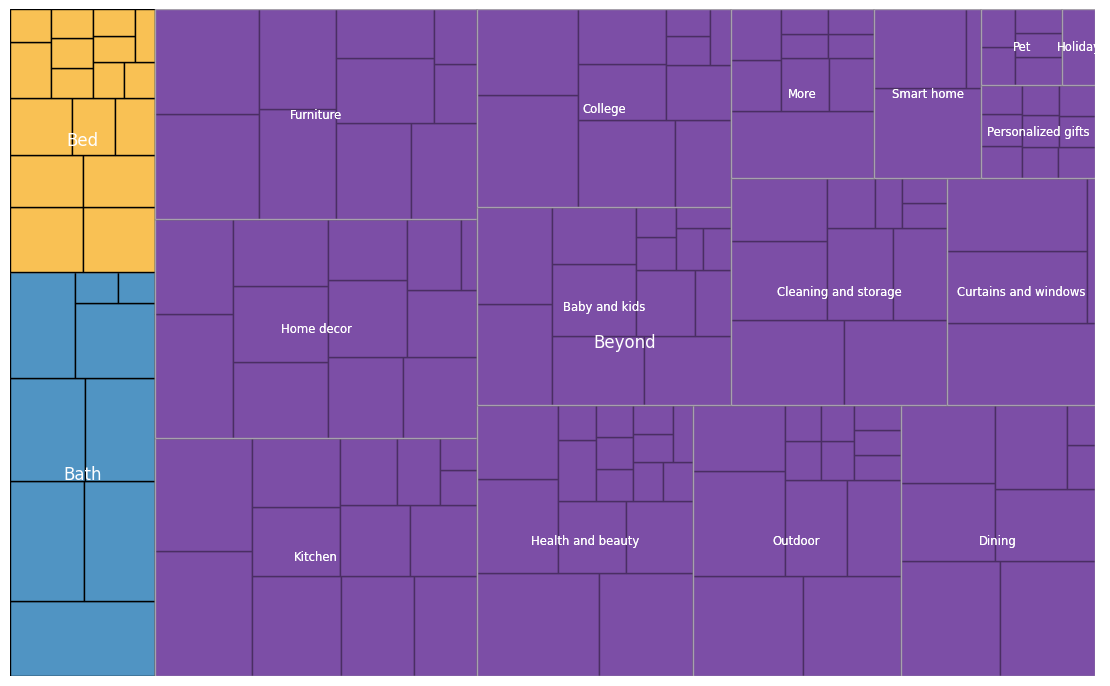

In [29]:
x = 0
y = 0
width = 1400
height = 866
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(figsize=(width*px,height*px))

ax.set_xlim(x, width)
ax.set_ylim(y, height)

category_normalized = squarify.normalize_sizes(df_bbb['value'], width, height)

category_rectangles = squarify.squarify(category_normalized, x, y, width, height)


for index, row in df_bbb.iterrows():

    ax.add_patch(patches.Rectangle((category_rectangles[index]['x'], category_rectangles[index]['y']), category_rectangles[index]['dx'], category_rectangles[index]['dy'],alpha=0.6, ec='white', facecolor=df_bbb.iloc[index,2]))
    x_text = category_rectangles[index]['x'] + category_rectangles[index]['dx'] / 2
    y_text = category_rectangles[index]['y'] + category_rectangles[index]['dy'] / 2
    ax.text(x_text, y_text,df_bbb.iloc[index,0], ha='center', va='center', fontsize='large', color='white')

    if(row.iloc[0] == 'Bath'):
        df_bath = sorted_df[sorted_df['category']=='Bath']
        x = 0
        y = 0
        dx = 187.1220872336188
        dy = 525.0068544181196

        bath_normalized = squarify.normalize_sizes(df_bath['value'], dx, dy)
        bath_squarify = squarify.squarify(bath_normalized, x, y, dx, dy)
        for r in bath_squarify:
            ax.add_patch(patches.Rectangle((r['x'], r['y']), r['dx'], r['dy'], ec='black', color=df_bbb.iloc[index,2]))
    
    if(row.iloc[0] == 'Bed'):
        df_bed = sorted_df[sorted_df['category']=='Bed']
        x = 0
        y = 525.0068544181196
        dx = 187.1220872336188
        dy = 340.99314558188047

        bed_normalized = squarify.normalize_sizes(df_bed['value'], dx, dy)
        bed_squarify = squarify.squarify(bed_normalized, x, y, dx, dy)
        for r in bed_squarify:
            ax.add_patch(patches.Rectangle((r['x'], r['y']), r['dx'], r['dy'], ec='black', color=df_bbb.iloc[index,2]))

    else:
        df_beyond = sorted_df[~((sorted_df['category'] == 'Bath') | (sorted_df['category'] == 'Bed'))]
        df_beyond = df_beyond.reset_index(drop=True)
        x = 187.1220872336188
        y = 0
        dx = 1212.877912766381
        dy = 866.0

        
        df2_filtered = df2[~((df2['category'] == 'Bath') | (df2['category'] == 'Bed'))]
        df2_filtered = df2_filtered.sort_values(by='value', ascending=False).reset_index(drop=True)

        beyond_normalized = squarify.normalize_sizes(df2_filtered['value'], dx, dy)
        beyond_squarify = squarify.squarify(beyond_normalized, x, y, dx, dy)


        for index, row in df2_filtered.iterrows():
            category_df = df_beyond[df_beyond['category']==df2_filtered.iloc[index,0]]
            category_normalized = squarify.normalize_sizes(category_df['value'], beyond_squarify[index].get('dx'), beyond_squarify[index].get('dy'))
            category_squarify = squarify.squarify(category_normalized, beyond_squarify[index].get('x'), beyond_squarify[index].get('y'), beyond_squarify[index].get('dx'), beyond_squarify[index].get('dy'))
            for r in category_squarify:
                ax.add_patch(patches.Rectangle((r['x'], r['y']), r['dx'], r['dy'], ec='black', color=df2_filtered.iloc[index,2]))
            ax.add_patch(patches.Rectangle((beyond_squarify[index]['x'], beyond_squarify[index]['y']), beyond_squarify[index]['dx'], beyond_squarify[index]['dy'],alpha=0.6, ec='white',label=df2_filtered.iloc[index,0], facecolor=df2_filtered.iloc[index,2]))
            x_text = beyond_squarify[index]['x'] + beyond_squarify[index]['dx'] / 2
            y_text = beyond_squarify[index]['y'] + beyond_squarify[index]['dy'] / 2
            ax.text(x_text, y_text,df2_filtered.iloc[index,0], ha='center', va='center', fontsize='small', color='white')

plt.axis("off")
    
plt.show()

In [16]:
category_rectangles

[{'x': 0, 'y': 0, 'dx': 187.1220872336188, 'dy': 525.0068544181196},
 {'x': 0,
  'y': 525.0068544181196,
  'dx': 187.1220872336188,
  'dy': 340.99314558188047},
 {'x': 187.1220872336188, 'y': 0, 'dx': 1212.877912766381, 'dy': 866.0}]

In [18]:
# fig, ax = plt.subplots(figsize=(12,6))

# df2_value = df2['value']
# df2_category = df2['category']

# df3_value = sorted_df['value']
  
# squarify.plot(df2_value, label=df2_category, color=df2['color'], edgecolor=WHITE, text_kwargs=dict(fontsize=7.5, color=WHITE))
# squarify.plot(df3_value, color=sorted_df['color'], edgecolor='black',alpha=0.5, text_kwargs=dict(fontsize=7.5, color=WHITE))
  
# plt.axis("off") 

# plt.show()

In [19]:
# df2['category'].unique()

In [20]:
# x = 0
# y = 0

# width = 1
# height = 1

# fig, ax = plt.subplots(figsize=(12,6))

# df = df.sort_values(by='value', ascending=False)

# df_value = df['value']
# df_category = df['category']

# values = squarify.normalize_sizes(df_value, width, height)

# squarify.plot(df.groupby(by='category').sum()['value'], label=df2_category, ec='white')
# squarify.plot(values, ec='black', alpha=0.5)

In [21]:
# x = 0
# y = 0
# width = 1
# height = 1

# fig, ax = plt.subplots(figsize=(12,6))

# df2_value = df2['value']
# df2_category = df2['category']

# values = squarify.normalize_sizes(df2_value, width, height)

# big_rects = squarify.squarify(values, x, y, width, height)
# print(big_rects)
  
# # squarify.plot(values, label=df2_category, color=df2['color'],ax=ax, edgecolor=WHITE, text_kwargs=dict(fontsize=7.5, color=WHITE))
# for j in range(len(big_rects)):
#     rectangle2 = patches.Rectangle((big_rects[j]['x'], big_rects[j]['y']), big_rects[j]['dx'], big_rects[j]['dy'], label=df2_category, edgecolor=WHITE)
#     ax.add_patch(rectangle2)

# for index, c in enumerate(df2_category):
#     df_furniture = df2.loc[df2['category']==c]
#     df_furniture = df_furniture.sort_values(by='value', ascending=False)
#     df_furniture_value = df_furniture['value']
#     n_width = values[index]
#     n_height = values[index]
#     f_values = squarify.normalize_sizes(df_furniture_value, n_width, n_height)
#     f_rect = squarify.squarify(f_values, big_rects[index]['x'], big_rects[index]['y'], n_width, n_height)
#     # print(f_rect)

#     for i in range(len(f_rect)):
#         rectangle3 = patches.Rectangle((f_rect[i]['x'], f_rect[i]['y']), f_rect[i]['dx'], f_rect[i]['dy'], edgecolor='black')
#         ax.add_patch(rectangle3)

# # squarify.plot(f_values, alpha=0.2, ec='k', ax=ax)
  
# plt.axis("off") 

# plt.show()

In [22]:
# frames = [df, df2]
# df_result = pd.concat(frames)
# df_result

In [23]:
# x = 0
# y = 0
# width = 700
# height = 433

# fig, ax= plt.subplots(figsize=(12,6))

# df2_value = df_result['value']
# df2_category = df_result['category']

# values = squarify.normalize_sizes(df2_value, width, height)
  
# squarify.plot(values, color=df_result['color'], ax=ax, edgecolor=WHITE, text_kwargs=dict(fontsize=7.5, color=WHITE))
  
# plt.axis("off") 



# plt.show()

In [24]:
# pd.DataFrame(data)

In [25]:
# data = []
# for index, row in df2.iterrows():
#     cat_dict = dict(id=df2.iloc[index,0], datum=df2.iloc[index,1], children=[])

#     individual_cat_values = []
#     for index2, row in df.iterrows():
#         if df.iloc[index2, 0] == df2.iloc[index,0]:
#             # print(df.iloc[index2, 1])
#             individual_cat_values.append(df.iloc[index2, 1])
#             cat_dict.update({'children': individual_cat_values})
#     data.append(cat_dict)

# circles = circlify.circlify(
#     data, 
#     show_enclosure=False, 
#     target_enclosure=circlify.Circle(x=0, y=0, r=1)
# )

# # Create just a figure and only one subplot
# fig, ax = plt.subplots(figsize=(10,10))

# # Remove axes
# ax.axis('off')

# # Find axis boundaries
# lim = max(
#     max(
#         abs(circle.x) + circle.r,
#         abs(circle.y) + circle.r,
#     )
#     for circle in circles
# )
# plt.xlim(-lim, lim)
# plt.ylim(-lim, lim)

# # Print circle the highest level (continents):
# for circle in circles:
#     if circle.level != 1:
#       continue
#     x, y, r = circle
#     label = circle.ex["id"]
#     ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))
#     plt.annotate(label, (x,y ), ha='center', color="white")

# # Print circle and labels for the highest level:
# for circle in circles:
#     if circle.level != 2:
#       continue
#     x, y, r = circle
    
#     ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))